In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("autos.csv")

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers

df = df.replace("?", np.nan)
df.dtypes



symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<font size ="2.5"> We can calculate the correlation between variables of type `int64` or `float64` using the method `corr()`.

In [10]:
df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.525095,-0.356792,-0.227799,-0.533078,-0.229281,-0.107229,-0.177413,-0.030557,0.039598
wheel-base,-0.525095,1.000000,0.877612,0.795115,0.582603,0.781763,0.573989,0.249199,-0.479633,-0.552897
length,-0.356792,0.877612,1.000000,0.841199,0.491969,0.878090,0.683830,0.157913,-0.673251,-0.706635
width,-0.227799,0.795115,0.841199,1.000000,0.274075,0.868493,0.737042,0.180287,-0.647177,-0.681169
height,-0.533078,0.582603,0.491969,0.274075,1.000000,0.298429,0.068577,0.261036,-0.055659,-0.113995
curb-weight,-0.229281,0.781763,0.878090,0.868493,0.298429,1.000000,0.850611,0.151372,-0.758238,-0.798088
engine-size,-0.107229,0.573989,0.683830,0.737042,0.068577,0.850611,1.000000,0.029083,-0.654101,-0.677775
compression-ratio,-0.177413,0.249199,0.157913,0.180287,0.261036,0.151372,0.029083,1.000000,0.324186,0.264677
city-mpg,-0.030557,-0.479633,-0.673251,-0.647177,-0.055659,-0.758238,-0.654101,0.324186,1.000000,0.971311
highway-mpg,0.039598,-0.552897,-0.706635,-0.681169,-0.113995,-0.798088,-0.677775,0.264677,0.971311,1.000000


<font size = "2.6"> Find the correlation between the following columns *bore, stroke, compression-ratio, horsepower*.

In [29]:
df_corr = df[["bore", "stroke", "compression-ratio", "horsepower"]]
df_corr.dropna(subset=["bore", "stroke", "compression-ratio", "horsepower"], axis = 0)
df_corr.corr()

,compression-ratio
compression-ratio,1.0


 <font size = "3">1. Plot the highway-mpg vs price using `regplot`.

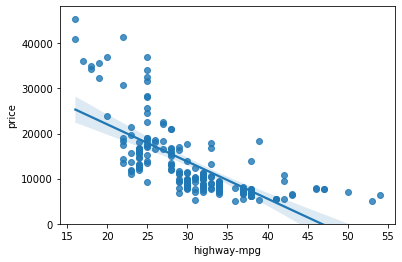

,price
price,1.0


In [64]:
 #df["price"] = pd.to_numeric(df["price"], errors='coerce')

df.dropna(subset= ["price"], axis=0)
df["price"] = df["price"].astype(float)
sns.regplot(x = "highway-mpg", y="price", data = df)
plt.ylim(0)
plt.show()

df[["highway-mpg", "price"]].corr()
#df[["stroke","price"]].corr()

<font size="3"> 2. Categorical variables.<br>
<font size="2.5"> The categorical variables can have the type `object` or `int64`. A good way to visualize them is by Boxplots.

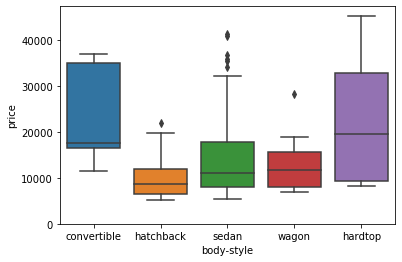

In [67]:
sns.boxplot(x="body-style", y="price", data=df)
plt.ylim(0,)
plt.show()

<font size="3"> Descriptive Staticstical Analysis <br>

In [73]:
df.describe()
df.describe(include ="all") 
df.describe(include ="object")

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm
count,164,204,204,204,202,204,204,204,204,204,204,200,200,202,202
unique,51,22,2,2,2,5,3,2,7,7,8,38,36,59,23
top,161,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500
freq,11,32,184,167,114,96,120,201,148,158,93,23,20,19,37


<font size = "3"> `Count_values()` and convert that to `dataframe`, rename a new variable  and remove existing index of the dataframe, lastly, relocate the position of the columns in `Pandas`.

,drive_wheels,counts
0,fwd,120
1,rwd,75
2,4wd,9


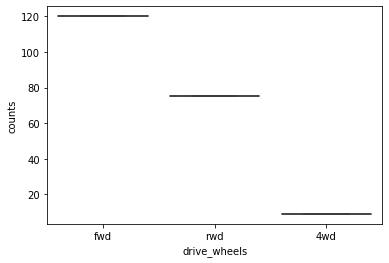

In [107]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns = {"drive-wheels":"counts"}, inplace = True)
#now lets rename the index to "drive wheels"
#drive_wheels_counts.index.name = "drive_wheels"
drive_wheels_counts['drive_wheels'] = drive_wheels_counts.index
drive_wheels_counts.reset_index(drop=True, inplace=True)
drive_wheels_counts = drive_wheels_counts[["drive_wheels", "counts" ]]
sns.boxplot(x = "drive_wheels", y="counts", data=drive_wheels_counts)
drive_wheels_counts

**Groupby** and **Pivot**

In [136]:
df.dropna(subset= ["price"], axis =0)
grouped_pivot = df[["price", "body-style", "drive-wheels"]].groupby(["body-style", "drive-wheels"], as_index = False).mean()
grouped_pivot

,body-style,drive-wheels,price
0,convertible,fwd,11595.000000
1,convertible,rwd,26563.250000
2,hardtop,fwd,8249.000000
3,hardtop,rwd,24202.714286
4,hatchback,4wd,7603.000000
5,hatchback,fwd,8396.387755
6,hatchback,rwd,14337.777778
7,sedan,4wd,12647.333333
8,sedan,fwd,9811.800000
9,sedan,rwd,21711.833333


Now convert that to `Povit table` using `pivot method`

In [137]:
df_pivot = grouped_pivot.pivot(index = "drive-wheels", columns = "body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

**Heatmap** <br>
Now use a heat map to visualize the relationship between *price* vs *body-style*. 

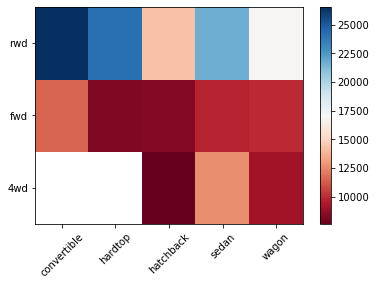

In [144]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot,  cmap='RdBu')

# label names
row_label = df_pivot.columns.levels[1]
col_label = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_label, minor=False)
ax.set_yticklabels(col_label, minor=False)

#rotate label if too long
plt.xticks(rotation=45)

fig.colorbar(im)
plt.show()

**Correlation and Causation** <br>
*Correlation*: a measure of the extent of interdependence between two variables <br>
*Causation*: the relationship between cause and effect between two variables
<br>
<br>
**Pearson Correlation** <br>
The Pearson correlation measures the linear dependence between two variables `x` and `y`. <br>
      `1`:  perfect positive correlation <br>
      `0`: no linear correlation <br>
      `-1`: perfect *negative* linear correlation <br>

<br>
Pearson method is the default method of the function `corr()`.

Lets calculate the Pearson Correlation Coefficient and P-value of *wheel-base* and *price* using `scipy.stats` method

In [175]:
from scipy import stats

df.dropna(subset= ["price"], axis =0, inplace = True)


pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "\nP-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5891470005448705 
P-value of P = 4.4570195020504053e-20


**Horsepower vs price**

In [186]:
df["horsepower"] = df["horsepower"].astype("float64")
df.dropna(subset = ["horsepower"], axis = 0, inplace = True)
df["horsepower"].isnull().values.any()
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, "\nP-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8105870539462103 
P-value of P = 1.9850422817669902e-47


**Conclusion**: since `p_value` is `< 0.001`, the correlation between *horsepower* and *price* is statistically significant, <br>
    and the linear relationshipis quite strong (`~0.81`, close to `1`)

In [ ]:
**ANOVA: Analysis of Variance**
    
ANOVA is a statistical method used to test whether there are significant differences 
    between the means of two or more variables. It returns two parameters: `F-test score` and `P-value`.
<br>
<br>
**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means 
    deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger 
    difference between the means.
<br>
<br>
**P-value**: P-value tells how statistically significant our calculated score value is.

Since ANOVA analyzed the difference between different groups of the **same variable**, 
the `groupby()` will come in handy. Because the ANOVA algorithm averages the data 
internally, we do not need to take the average befor hand.


<br>
<br>
Lets see if different types of *drive-wheels* impack *price*.

In [193]:
df_gptest = df[['drive-wheels','body-style','price']]



df_group = df_gptest[['drive-wheels','price']].groupby(["drive-wheels"])
df_group.head(2)

,drive-wheels,price
0,rwd,16500.0
1,rwd,16500.0
2,fwd,13950.0
3,4wd,17450.0
4,fwd,15250.0
139,4wd,7603.0


We can obtain the values of the method group using the method `get_group()`

In [195]:
df_group.get_group("rwd")["price"]

0      16500.0
1      16500.0
9      16430.0
10     16925.0
11     20970.0
        ...   
199    16845.0
200    19045.0
201    21485.0
202    22470.0
203    22625.0
Name: price, Length: 74, dtype: float64

We can use the function `f_oneway()` in the module `stats` to obtain 
*F-test* and *P-value* of ANOVA ANALYSIS

In [212]:
f_test, p_value = stats.f_oneway(df_group.get_group('fwd')['price'], 
                                 df_group.get_group('rwd')['price'],
                                 df_group.get_group('4wd')['price']) 

print( "ANOVA results: F=", f_test, "\n               P =", p_value)

ANOVA results: F= 67.46312496022604 
               P = 5.404178876815785e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately. 
<br>
<br>
**fwd and rwd**

In [214]:
f_test, p_value  = stats.f_oneway(df_group.get_group('fwd')['price'], df_group.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_test, "\n               P =", p_value)

ANOVA results: F= 129.5035056435508 
               P = 3.649520293203105e-23


**4wd and rwd**

In [215]:
f_test, p_value  = stats.f_oneway(df_group.get_group('4wd')['price'], df_group.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_test, "\n               P =", p_value)

ANOVA results: F= 8.67069478113451 
               P = 0.004232262975461328


**4wd and fwd**

In [216]:
f_test, p_value  = stats.f_oneway(df_group.get_group('4wd')['price'], df_group.get_group('fwd')['price'])  
print( "ANOVA results: F=", f_test, "\n               P =", p_value)

ANOVA results: F= 0.6621740397322758 
               P = 0.41737884563910455


<h3>Conclusion: Important Variables</h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>
